### Alejandro Operé, María Mestre, Celia Ribes, Jordi Blasco

# Práctica 3 - Parte 2: Simulación Monte Carlo

## 📝 Enunciado
Este notebook contiene **dos ejercicios** de simulación **Monte Carlo**:

1. **Estimación de π** por muestreo uniforme en el cuadrado y conteo de puntos en el círculo inscrito. Además, se debe **graficar** el cuadrado, el círculo y los puntos **dentro** y **fuera** del círculo en colores distintos.

2. **Propagación de incertidumbre** en el **modelo cinemático** de un robot móvil diferencial con entradas fijas $v,\,\omega$ (trayectoria nominal curva). Se pide **añadir incertidumbre** (ruido) a $v$ y $\omega$, simular por Monte Carlo y **estimar la covarianza** de la pose final $(x, y, \theta))$.

---

## ✍️ Ejercicio 1 — Estimación de π con Monte Carlo


- Genera $N$ puntos $(x_i, y_i)$ **uniformes** en el cuadrado $[-1,1]\times[-1,1]$.
- Cuenta cuántos caen **dentro** del círculo de radio 1 centrado en el origen: $x_i^2 + y_i^2 \le 1$.
- Estima $\pi$ como $\hat{\pi} = 4\,n_{\text{dentro}}/N$.
- **Grafica**: el cuadrado, el círculo y los puntos dentro/fuera en **colores distintos**.
- Reporta la estimación de $\pi$, el error absoluto y relativo respecto del valor real.


## Explicación del código

**1. Importación de librerías**  
Como comienzo y base principal de este código, se realiza la importación de todas las librerías y módulos que sean necesarios para el correcto funcionamiento del código.  
En este caso, serán necesarias las librerías:
- `numpy`, para cálculos numéricos y generación de números aleatorios
- `matplotlib`, para la visualización de resultados finales (los puntos, el círculo y el cuadrado)  
  
**2. Generación de puntos**  
Se definirán $N$ puntos aleatorios de coordenadas ($x_i, y_i$) dentro del cuadrado $[-1,1]\times[-1,1]$ haciendo uso de la función de `numpy` `np.random.uniform()`, siendo estos puntos generados la base de esta simulación de Monte Carlo. 
  
**3. Estimación de π**  
Prosiguiendo, se procederá determinar cuáles de los puntos generados caerán dentro del círculo de radio 1 utilizando la condición expuesta en el enunciado $x_i^2 + y_i^2 \le 1$, dato que se guardará dentro de la variable "dentro", encontrada en el código.  
  
A continuación, se realizará el cálculo de la proporción de estos puntos respecto al total y se multiplicará por 4 para poder obtener la estimación de π. Tenemos la siguiente fórmula que recoge esta explicación: $\hat{\pi} = 4\,n_{\text{dentro}}/N$. En este código, esta estimación estará guardada dentro de la variable "pi-estimado".   

  
**4. Resultados numéricos**  
Por otro lado, también se realizarán una serie de cálculos sencillos previos a la visualización de los resultados de la estimación. Estos cálculos serán:
- **Error absoluto** (valor absoluto de la diferencia de π estimado y π real)
- **Error relativo** (valor del error absoluto entre valor de π real).  
  
**5. Visualización de resultados**  
Por último, se realizará una visualización de los resultados obtenidos (estimación de π, error absoluto y error relativo respecto al valor real) haciendo uso de la librería importada `matplotlib`. Las últimas líneas de código reflejan esta visualización, donde se crea una gráfica que muestra: por un lado el círculo de radio 1 con un borde negro, los puntos encontrados dentro del círculo de color azul y los puntos encontrados fuera del círculo de color naranja, reflejando así el proceso de estimación.  
  
Como última anotación, se muestra el valor numérico de esta estimación de π (guardada en la variable "pi_estimado") junto con los resultados respectivos del error absoluto y relativo calculados.

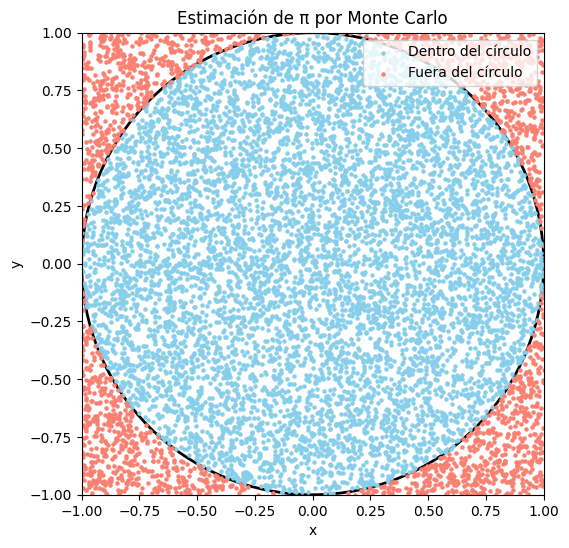

Estimación de π: 3.1084
Error absoluto: 0.033192653589793064
Error relativo: 1.0566%


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de simulación

# Número de puntos aleatorios
N = 10000

# Generar puntos uniformes en el cuadrado [-1, 1] x [-1, 1]
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

# Determinar los puntos dentro del círculo de radio 1
dentro = x**2 + y**2 <= 1

# Contar cuántos están dentro
n_dentro = np.sum(dentro)

# Estimación de π
pi_estimado = 4 * n_dentro / N

# Cálculo del error absoluto y relativo
pi_real = np.pi
error_abs = abs(pi_estimado - pi_real)
error_rel = error_abs / pi_real


# Gráficar

fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')

# Dibujar el círculo
circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2)
ax.add_artist(circle)

# Puntos dentro (azules) y fuera (naranjas)
ax.scatter(x[dentro], y[dentro], color='skyblue', s=5, label='Dentro del círculo')
ax.scatter(x[~dentro], y[~dentro], color='salmon', s=5, label='Fuera del círculo')

# Cuadrado de límites [-1,1]
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Estimación de π por Monte Carlo')
ax.legend(loc='upper right')

# Mostrar resultados
plt.show()


# Resultados numéricos
print(f"Estimación de π: {pi_estimado}")
print(f"Error absoluto: {error_abs}")
print(f"Error relativo: {error_rel:.4%}")


---

## ✍️ Ejercicio 2 — Propagación de incertidumbre en un robot móvil (modelo cinemático)
**Modelo.** Robot diferencial en el plano con entradas lineal $v$ y angular $\omega$ constantes durante cada paso de integración $\Delta t$:


\begin{aligned}
x_{k+1} &= x_k + v\,\cos(\theta_k)\,\Delta t,\\
y_{k+1} &= y_k + v\,\sin(\theta_k)\,\Delta t,\\
\theta_{k+1} &= \theta_k + \omega\,\Delta t.
\end{aligned}


**Enunciado.**

1. Simula la **trayectoria nominal** durante $T$ segundos con $\Delta t$, usando $v$ y $\omega$ constantes.

2. Introduce **incertidumbre** en $v$ y $\omega$: para cada simulación Monte Carlo, toma $v \sim \mathcal{N}(\bar v, \sigma_v^2)$ y $\omega \sim \mathcal{N}(\bar\omega, \sigma_\omega^2)$ (truncando si es necesario para evitar valores no físicos).

3. Ejecuta $M$ simulaciones, recopila la **pose final** $(x_T, y_T, \theta_T)$ y estima la **covarianza muestral** de la pose final.

4. **Grafica**: la trayectoria nominal y varias trayectorias muestrales. Dibuja también la **elipse de covarianza** en $(x_T, y_T)$.

5. Reporta la media muestral y la matriz de covarianza estimada.



**1. Qué hace el código**

Este código simula el movimiento de un robot (que se mueve con una velocidad lineal y angular) en un plano, considerando ruido/errores en sus controles para entender cómo se propaga la incertidumbre en su posición final. El propósito principal es usar el método de Monte Carlo para generar muchas trayectorias posibles con variaciones aleatorias y luego calcular la media y la covarianza (una medida de dispersión) de la posición final.

**2. Parámetros y configuración inicial**

- **Tiempo y pasos**: T=10 segundos total, dt=0.1 s por paso, lo que da N_steps=100 iteraciones. Esto divide el movimiento en pequeños incrementos para simular con precisión.
- **Velocidades nominales**: v_bar=1 m/s (avance recto) y omega_bar=0.5 rad/s (giro). Son los valores ideales sin errores.
- **Ruido**: sigma_v y sigma_omega son desviaciones estándar (alrededor del 10% de las velocidades), modelando variaciones gaussianas (normales, como errores comunes en sensores).
- **Simulaciones**: M=1000 repeticiones Monte Carlo para obtener la estadística de incertidumbre.
- **Posición inicial**: El robot empieza en (0,0) mirando hacia adelante (theta=0).

Estos parámetros son importantes porque definen el escenario: un robot girando lentamente mientras avanza durante 10 segundos. De esta forma podemos calibrar el nivel de ruido realista basado en hardware, para predecir si el robot llegará preciso a un destino.

**3. La función de simulación de trayectoria**

La función `simulate_trajectory` es el corazón del modelo cinemático (física del movimiento sin aceleraciones, solo velocidades instantáneas):

- Toma velocidad lineal v, angular omega, dt, número de pasos y pose inicial (x, y, theta).
- En cada paso, actualiza:
  - x nuevo = x + v * cos(theta) * dt (avance en dirección actual).
  - y nuevo = y + v * sin(theta) * dt (desplazamiento lateral).
  - theta nuevo = theta + omega * dt (giro).
- Guarda todas las posiciones en un array.

Esto modela un robot diferencial: v mueve las ruedas juntas, omega las hace girar diferencialmente.

**4. Simulación nominal y Monte Carlo**

- **Trayectoria nominal**: Llama la función con velocidades ideales (v_bar, omega_bar). Es la curva perfecta: un arco de círculo, ya que hay giro constante.
  
- **Monte Carlo**: Para cada una de las 1000 simulaciones (bucle for i in range(M)):
  - Muestrea v_sample y omega_sample de una distribución normal (media = nominal, desviación = sigma).
  - Asegura v >=0 (no retroceso físico).
  - Simula la trayectoria y guarda la pose final (x,y,theta).
  - Solo guarda 10 trayectorias completas para graficar.

Al final, calcula:
- **Media de poses finales**: Promedio de todas las [x,y,theta] (dónde termina "en promedio").
- **Covarianza**: np.cov mide cómo se dispersan x,y,theta entre sí y individualmente. Captura correlaciones, como que errores en v y omega afectan x e y de forma relacionada.

El método Monte Carlo es clave: repite experimentos aleatorios para estimar distribuciones reales cuando no hay fórmulas exactas. Aquí, propaga incertidumbre de controles a posición, esencial para localización en robots.

**5. Visualización de resultados**

Se crea una figura con dos subgráficos:

- **Izquierda (ax1)**: Muestra la trayectoria nominal en negro (la línea gruesa). Luego, 10 trayectorias muestrales en azul tenue (con alpha=0.3). Y puntos rojos para 100 posiciones finales aleatorias.Esto ilustra visualmente cómo el ruido hace que las paths diverjan del arco ideal.

- **Derecha (ax2)**: Puntos azules para todas las posiciones finales (x,y). Estrella negra para el final nominal. Y una elipse roja (función plot_cov_ellipse) que representa 3 desviaciones estándar de la covarianza en x-y (usa eigenvalores para orientación y tamaño). La elipse envuelve ~99% de puntos, mostrando la nube de incertidumbre.

La función plot_cov_ellipse dibuja elipse de confianza: calcula ángulo y semi-ejes de la matriz de covarianza para posición 2D. Es importante para ver no solo dispersión, sino tambíen la dirección.

**6. Resultados numéricos**

Al final, imprime:
- Media de pose final con ± desviación estándar (raíz de diagonal de covarianza) para x, y, theta.
- La matriz de covarianza completa (3x3).

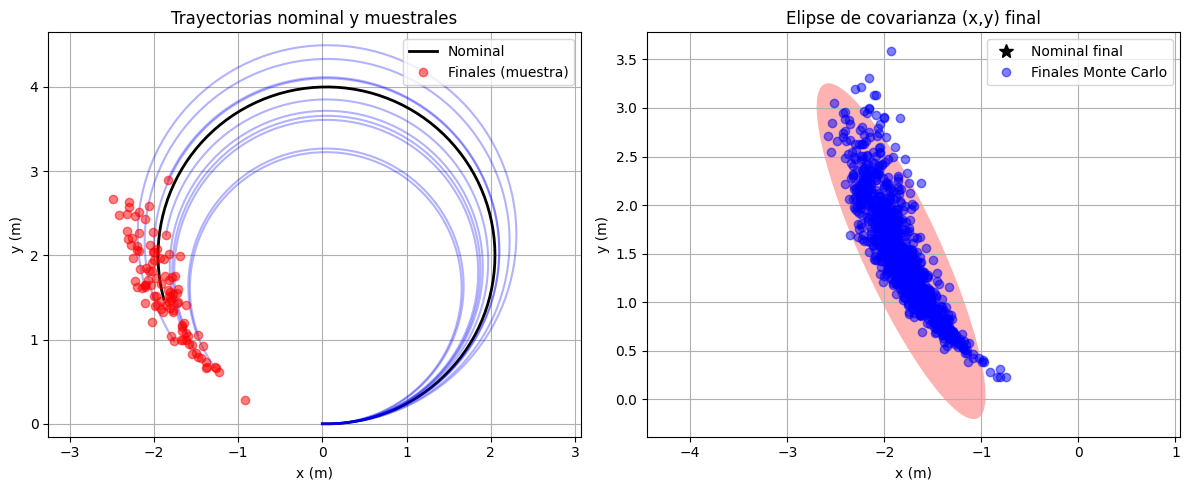

Media muestral de la pose final:
x: -1.8267 ± 0.2902
y: 1.5242 ± 0.5769
θ: 4.9978 ± 0.2552 rad

Matriz de covarianza estimada:
[[ 0.0842128  -0.14385783  0.05602755]
 [-0.14385783  0.33276994 -0.14125833]
 [ 0.05602755 -0.14125833  0.06511185]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
import math

# Parámetros de la simulación
T = 10.0  # Tiempo total en segundos
dt = 0.1  # Paso de tiempo
v_bar = 1.0  # Velocidad lineal nominal (m/s)
omega_bar = 0.5  # Velocidad angular nominal (rad/s)
sigma_v = 0.1 * v_bar  # Desviación estándar para v
sigma_omega = 0.05 * omega_bar  # Desviación estándar para omega
M = 1000  # Número de simulaciones Monte Carlo
N_steps = int(T / dt)  # Número de pasos

# Pose inicial
x0, y0, theta0 = 0.0, 0.0, 0.0

def simulate_trajectory(v, omega, dt, N_steps, initial_pose):
    """
    Simula una trayectoria usando el modelo cinemático.
    """
    x, y, theta = initial_pose
    trajectory = np.array([[x, y, theta]])
    for _ in range(N_steps):
        x += v * np.cos(theta) * dt
        y += v * np.sin(theta) * dt
        theta += omega * dt
        trajectory = np.vstack([trajectory, [x, y, theta]])
    return trajectory

# 1. Simulación de la trayectoria nominal
nominal_trajectory = simulate_trajectory(v_bar, omega_bar, dt, N_steps, (x0, y0, theta0))

# 2. y 3. Simulaciones Monte Carlo
final_poses = np.zeros((M, 3))  # Almacena poses finales [x, y, theta]
sample_trajectories = []  # Para graficar algunas trayectorias muestrales

for i in range(M):
    # Muestreo de v y omega con ruido gaussiano
    v_sample = np.random.normal(v_bar, sigma_v)
    omega_sample = np.random.normal(omega_bar, sigma_omega)
    
    # Evitar valores no físicos (opcional: truncar v >= 0)
    v_sample = max(0.0, v_sample)
    
    traj = simulate_trajectory(v_sample, omega_sample, dt, N_steps, (x0, y0, theta0))
    final_poses[i] = traj[-1]  # Pose final
    if i < 10:  # Guardar 10 trayectorias muestrales para graficar
        sample_trajectories.append(traj)

# Estimación de media y covarianza muestral
mean_pose = np.mean(final_poses, axis=0)
cov_pose = np.cov(final_poses.T)  # Covarianza de [x, y, theta]

# 4. Graficar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de trayectorias
ax1.plot(nominal_trajectory[:, 0], nominal_trajectory[:, 1], 'k-', linewidth=2, label='Nominal')
for traj in sample_trajectories:
    ax1.plot(traj[:, 0], traj[:, 1], 'b-', alpha=0.3)
ax1.plot(final_poses[:100, 0], final_poses[:100, 1], 'ro', alpha=0.5, label='Finales (muestra)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_title('Trayectorias nominal y muestrales')
ax1.legend(loc='upper right')
ax1.grid(True)
ax1.axis('equal')

# Elipse de covarianza en (x,y)
cov_xy = cov_pose[:2, :2]  # Submatriz para x,y
mean_xy = mean_pose[:2]

# Función para dibujar elipse de confianza (3 sigma)
def plot_cov_ellipse(cov, mean, ax, n_std=3, **kwargs):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * n_std * np.sqrt(eigenvalues)
    ellipse = Ellipse(mean, width, height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

plot_cov_ellipse(cov_xy, mean_xy, ax2, n_std=3, facecolor='red', alpha=0.3)
ax2.plot(nominal_trajectory[-1, 0], nominal_trajectory[-1, 1], 'k*', markersize=10, label='Nominal final')
ax2.plot(final_poses[:, 0], final_poses[:, 1], 'bo', alpha=0.5, label='Finales Monte Carlo')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_title('Elipse de covarianza (x,y) final')
ax2.legend()
ax2.grid(True)
ax2.axis('equal')

plt.tight_layout()
plt.show()

# 5. Reportar media y covarianza
print("Media muestral de la pose final:")
print(f"x: {mean_pose[0]:.4f} ± {np.sqrt(cov_pose[0,0]):.4f}")
print(f"y: {mean_pose[1]:.4f} ± {np.sqrt(cov_pose[1,1]):.4f}")
print(f"θ: {mean_pose[2]:.4f} ± {np.sqrt(cov_pose[2,2]):.4f} rad")
print("\nMatriz de covarianza estimada:")
print(cov_pose)
